In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost

In [3]:
train = pd.read_csv(r'C:\Users\user\Desktop\kaggle housing price\train.csv')
test = pd.read_csv(r'C:\Users\user\Desktop\kaggle housing price\test.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Preparing the training and test set

In [4]:
train_x = train.iloc[:, :-1].values
train_x = pd.DataFrame(train_x, columns = train.columns[0:80])
train_y = train.iloc[:, 80].values
train_y = pd.DataFrame(train_y, columns = ["SalePrice"])
test_x = test

In [26]:
train_x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [27]:
test_x.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(train_x.shape)
print(test_x.shape)

(1460, 80)
(1459, 80)


In [16]:
combined = pd.concat([train_x, test_x], axis=0)
combined = combined.reset_index(drop=True)

In [17]:
combined.shape

(2919, 80)

In [18]:
combined = combined.drop(['Id'], axis =1)

# Feature selection

Those features have more than 50% missing values are dropped

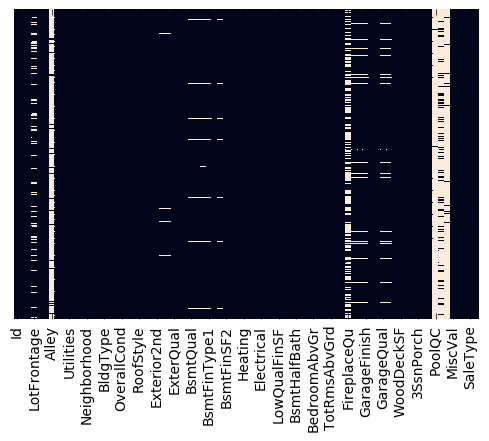

In [17]:
sns.heatmap(combined.isnull(),yticklabels=False,cbar=False)
plt.show()

In [19]:
combined.drop(["Alley","PoolQC"],axis=1, inplace = True)

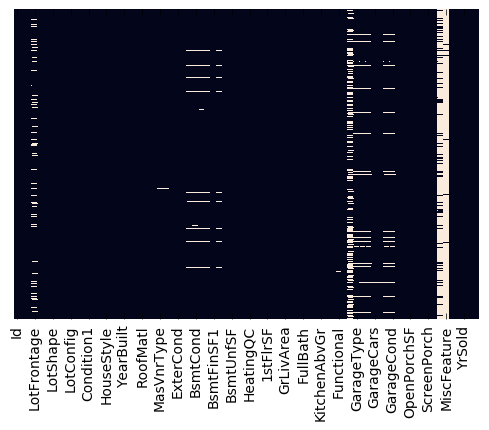

In [20]:
sns.heatmap(combined.isnull(),yticklabels=False,cbar=False)
plt.show()

In [20]:
combined.drop(["Fence","MiscFeature"],axis=1, inplace = True)

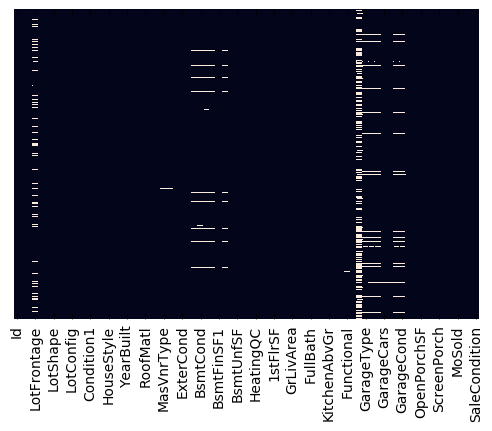

In [22]:
sns.heatmap(combined.isnull(),yticklabels=False,cbar=False)
plt.show()

Features  "LotFrontage"  have  486  and  "FireplaceQu"  have  1420  missing values out of  2919  values. Other features have very less missing values. So filling the missing values with  mean/meadian/mode  for this can distort the algorithm. So to take care of missing values for this two features I will apply  machine learning algorithms  and for the other features I will apply  mean/median/mode  method.

In [21]:
combined["MSZoning"] = combined["MSZoning"].fillna(combined["MSZoning"].mode().iloc[0])
combined["Utilities"] = combined["Utilities"].fillna(combined["Utilities"].mode().iloc[0])
combined["Exterior1st"] = combined["Exterior1st"].fillna(combined["Exterior1st"].mode().iloc[0])
combined["Exterior2nd"] = combined["Exterior2nd"].fillna(combined["Exterior2nd"].mode().iloc[0])
combined["MasVnrType"] = combined["MasVnrType"].fillna(combined["MasVnrType"].mode().iloc[0])
combined["MasVnrArea"] = combined["MasVnrArea"].fillna(combined["MasVnrArea"].mode().iloc[0])

In [22]:
combined["BsmtQual"] = combined["BsmtQual"].fillna(combined["BsmtQual"].mode().iloc[0])
combined["BsmtCond"] = combined["BsmtCond"].fillna(combined["BsmtCond"].mode().iloc[0])
combined["BsmtExposure"] = combined["BsmtExposure"].fillna(combined["BsmtExposure"].mode().iloc[0])
combined["BsmtFinType1"] = combined["BsmtFinType1"].fillna(combined["BsmtFinType1"].mode().iloc[0])
combined["BsmtFinSF1"] = combined["BsmtFinSF1"].fillna(combined["BsmtFinSF1"].mode().iloc[0])
combined["BsmtFinType2"] = combined["BsmtFinType2"].fillna(combined["BsmtFinType2"].mode().iloc[0])

In [23]:
combined["BsmtFinSF2"] = combined["BsmtFinSF2"].fillna(combined["BsmtFinSF2"].mode().iloc[0])
combined["BsmtUnfSF"] = combined["BsmtUnfSF"].fillna(combined["BsmtUnfSF"].mode().iloc[0])
combined["TotalBsmtSF"] = combined["TotalBsmtSF"].fillna(combined["TotalBsmtSF"].mode().iloc[0])
combined["Electrical"] = combined["Electrical"].fillna(combined["Electrical"].mode().iloc[0])
combined["BsmtFullBath"] = combined["BsmtFullBath"].fillna(combined["BsmtFullBath"].mode().iloc[0])
combined["BsmtHalfBath"] = combined["BsmtHalfBath"].fillna(combined["BsmtHalfBath"].mode().iloc[0])

In [24]:
combined["KitchenQual"] = combined["KitchenQual"].fillna(combined["KitchenQual"].mode().iloc[0])
combined["Functional"] = combined["Functional"].fillna(combined["Functional"].mode().iloc[0])
combined["GarageType"] = combined["GarageType"].fillna(combined["GarageType"].mode().iloc[0])
combined["GarageYrBlt"] = combined["GarageYrBlt"].fillna(combined["GarageYrBlt"].mode().iloc[0])
combined["GarageFinish"] = combined["GarageFinish"].fillna(combined["GarageFinish"].mode().iloc[0])
combined["GarageCars"] = combined["GarageCars"].fillna(combined["GarageCars"].mode().iloc[0])

In [25]:
combined["GarageArea"] = combined["GarageArea"].fillna(combined["GarageArea"].mode().iloc[0])
combined["GarageQual"] = combined["GarageQual"].fillna(combined["GarageQual"].mode().iloc[0])
combined["GarageCond"] = combined["GarageCond"].fillna(combined["GarageCond"].mode().iloc[0])
combined["SaleType"] = combined["SaleType"].fillna(combined["SaleType"].mode().iloc[0])

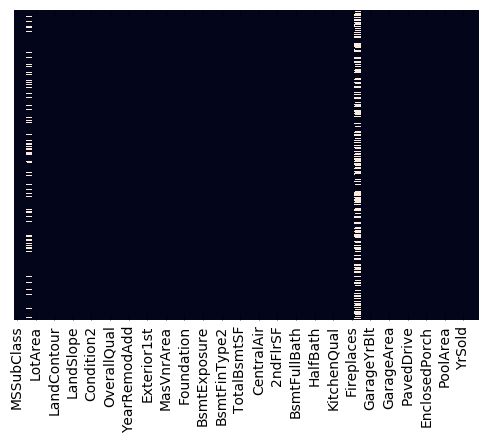

In [87]:
sns.heatmap(combined.isnull(),yticklabels=False,cbar=False)
plt.show()

In [26]:
combined.shape

(2919, 75)

In [27]:
data_for_use_without_null = combined.dropna(axis = 1)
column_name_with_null_values = combined.columns[combined.isnull().any()].tolist()

In [28]:
data_for_use_without_null.shape

(2919, 73)

In [29]:
column_name_with_null_values

['LotFrontage', 'FireplaceQu']

In [30]:
categorical_features =['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                       'Condition1','Condition2','BldgType','HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
                       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

# One hot encoding of the categorical features

In [31]:
data_for_use_without_null_dummy = data_for_use_without_null
for label in categorical_features:
    dummy = pd.get_dummies(data_for_use_without_null_dummy[label],drop_first=False)
    data_for_use_without_null_dummy = pd.concat([data_for_use_without_null_dummy, dummy], axis=1)
    data_for_use_without_null_dummy.drop([label],axis=1, inplace = True)

In [32]:
data_for_use_without_null_dummy.shape

(2919, 269)

In [33]:
name_0 = combined[column_name_with_null_values[0]]
data_regressor = pd.concat([data_for_use_without_null_dummy, name_0], axis=1)

In [34]:
data_regressor_train = data_regressor.dropna(axis = 0)
data_regressor_test = data_regressor[data_regressor.isnull().any(axis=1)]
data_regressor_train.reset_index(drop=True)
data_regressor_test.reset_index(drop=True)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial,LotFrontage
0,60,10382,7,6,1973,1973,240.0,859.0,32.0,216.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
1,20,12968,5,6,1962,1962,0.0,737.0,0.0,175.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
2,20,10920,6,5,1960,1960,212.0,733.0,0.0,520.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
3,20,11241,6,7,1970,1970,180.0,578.0,0.0,426.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
4,20,8246,5,8,1968,2001,0.0,188.0,668.0,204.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
5,20,8544,5,6,1966,2006,0.0,0.0,0.0,1228.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
6,85,9180,5,7,1983,1983,0.0,747.0,93.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
7,20,9200,5,6,1975,1980,0.0,280.0,491.0,167.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
8,60,13869,6,6,1997,1997,0.0,182.0,0.0,612.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
9,60,9375,7,5,1997,1998,573.0,739.0,0.0,318.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN


In [35]:
data_regressor_train_x = data_regressor_train.iloc[:, :-1].values
#data_regressor_train_x = pd.DataFrame(data_regressor_train_x, columns = data_regressor_train.columns[0:269])
data_regressor_train_y = data_regressor_train.iloc[:, 269].values
#data_regressor_train_y = pd.DataFrame(data_regressor_train_y, columns = data_regressor_train.columns[269:270])

In [36]:
data_regressor_train.shape

(2433, 270)

In [37]:
data_regressor_train_x.shape

(2433, 269)

In [38]:
data_regressor_train_y.shape

(2433,)

# Predicting the missing values in the column

Predicting the missing values in the dataset with respect to the values present in the current dataset

In [39]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [40]:
from sklearn.model_selection import cross_val_score

In [35]:
RandomForestRegressor = RandomForestRegressor()
score_RandomForestRegressor = cross_val_score(RandomForestRegressor, data_regressor_train_x, data_regressor_train_y, cv=5, scoring= 'neg_mean_squared_error')
RandomForestRegression = -score_RandomForestRegressor.mean()
print(RandomForestRegression)

246.133084797


In [36]:
BaggingRegressor = BaggingRegressor()
score_BaggingRegressor = cross_val_score(BaggingRegressor, data_regressor_train_x, data_regressor_train_y, cv=5, scoring= 'neg_mean_squared_error')
BaggingRegression = -score_BaggingRegressor.mean()
print(BaggingRegression)

229.351517935


In [132]:
AdaBoostRegressor = AdaBoostRegressor()
score_AdaBoostRegressor = cross_val_score(AdaBoostRegressor, data_regressor_train_x, data_regressor_train_y, cv=5, scoring= 'neg_mean_squared_error')
AdaBoostRegression = -score_AdaBoostRegressor.mean()
print(AdaBoostRegression)

373.56603489


In [133]:
SVR = SVR()
score_SVR = cross_val_score(SVR, data_regressor_train_x, data_regressor_train_y, cv=5, scoring= 'neg_mean_squared_error')
SVRegression = -score_SVR.mean()
print(SVRegression)

545.935649457


In [136]:
KNeighborsRegressor = KNeighborsRegressor()
score_KNeighborsRegressor = cross_val_score(KNeighborsRegressor, data_regressor_train_x, data_regressor_train_y, cv=5, scoring= 'neg_mean_squared_error')
KNeighborsRegression = -score_KNeighborsRegressor.mean()
print(KNeighborsRegression)

322.264300014


In [35]:
data_regressor_train_x_xgb = data_regressor_train.iloc[:, :-1].values
data_regressor_train_y_xgb = data_regressor_train.iloc[:, 269].values

In [150]:
XGBRegressor = XGBRegressor()
score_XGBRegressor = cross_val_score(XGBRegressor, data_regressor_train_x_xgb, data_regressor_train_y_xgb, cv=5, scoring= 'neg_mean_squared_error')
XGBRegression = -score_XGBRegressor.mean()
print(XGBRegression)

247.142887504


In [41]:
from sklearn.cross_validation import train_test_split
data_regressor_train_x_cv, data_regressor_test_x_cv, data_regressor_train_y_cv, data_regressor_test_y_cv = train_test_split(data_regressor_train_x, data_regressor_train_y, test_size=.1, random_state=0)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [42]:
data_regressor_train_y.shape

(2433,)

In [43]:
print(data_regressor_train_x_cv.shape)
print(data_regressor_test_x_cv.shape)
print(data_regressor_train_y_cv.shape)
print(data_regressor_test_y_cv.shape)

(2189, 269)
(244, 269)
(2189,)
(244,)


In [34]:
BaggingRegressor1 = BaggingRegressor()

In [35]:
BaggingRegressor1.fit(data_regressor_train_x_cv, data_regressor_train_y_cv)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [51]:
y_train_pred = BaggingRegressor1.predict(data_regressor_train_x_cv)
y_test_pred = BaggingRegressor1.predict(data_regressor_test_x_cv)

train_error = mean_squared_error(y_train_pred, data_regressor_train_y_cv)
test_error = mean_squared_error(y_test_pred, data_regressor_test_y_cv)

print(train_error)
print(test_error)

35.8247944613
177.271721311


In [44]:
from sklearn.metrics import mean_squared_error

In [106]:
max_features = [10, 20, 30, 50, 75, 100, 125, 150, 175, 200]
train_results = []
test_results = []

In [107]:
for features in max_features:
    model = BaggingRegressor(max_features = features)
    model.fit(data_regressor_train_x_cv, data_regressor_train_y_cv)
    train_pred = model.predict(data_regressor_train_x_cv)
    mse_train = mean_squared_error(train_pred, data_regressor_train_y_cv)
    train_results.append(mse_train)
    test_pred = model.predict(data_regressor_test_x_cv)
    mse_test = mean_squared_error(test_pred, data_regressor_test_y_cv)
    test_results.append(mse_test)

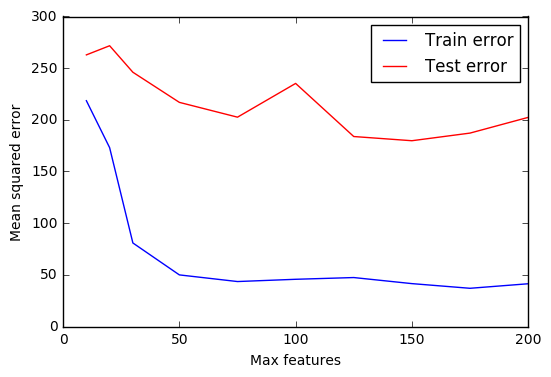

In [108]:
line1 = plt.plot(max_features, train_results, 'b', label='Train error')
line2 = plt.plot(max_features, test_results, 'r' , label='Test error')
plt.ylabel('Mean squared error')
plt.xlabel('Max features')
plt.legend()
plt.show()

In [37]:
max_features = [10, 20, 30, 50, 75, 100, 125, 150, 175, 200]
train_results = []
test_results = []

In [38]:
for features in max_features:
    model = BaggingRegressor(max_features = features)
    model.fit(data_regressor_train_x_cv, data_regressor_train_y_cv)
    train_pred = model.predict(data_regressor_train_x_cv)
    mse_train = mean_squared_error(train_pred, data_regressor_train_y_cv)
    train_results.append(mse_train)
    test_pred = model.predict(data_regressor_test_x_cv)
    mse_test = mean_squared_error(test_pred, data_regressor_test_y_cv)
    test_results.append(mse_test)

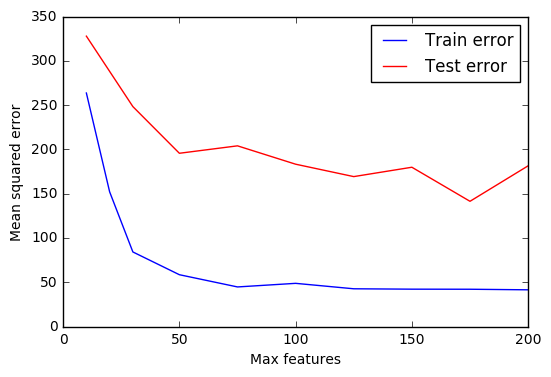

In [39]:
line1 = plt.plot(max_features, train_results, 'b', label='Train error')
line2 = plt.plot(max_features, test_results, 'r' , label='Test error')
plt.ylabel('Mean squared error')
plt.xlabel('Max features')
plt.legend()
plt.show()

 50, 75, 125, 150, 175, 200

In [110]:
max_samples = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
train_results = []
test_results = []

In [111]:
for samples in max_samples:
    model = BaggingRegressor(max_samples = samples)
    model.fit(data_regressor_train_x_cv, data_regressor_train_y_cv)
    train_pred = model.predict(data_regressor_train_x_cv)
    mse_train = mean_squared_error(train_pred, data_regressor_train_y_cv)
    train_results.append(mse_train)
    test_pred = model.predict(data_regressor_test_x_cv)
    mse_test = mean_squared_error(test_pred, data_regressor_test_y_cv)
    test_results.append(mse_test)

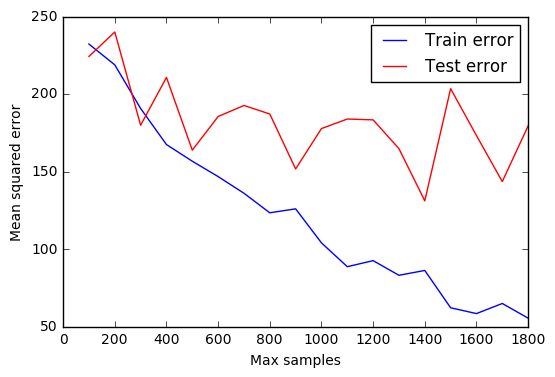

In [112]:
line1 = plt.plot(max_samples, train_results, 'b', label='Train error')
line2 = plt.plot(max_samples, test_results, 'r' , label='Test error')
plt.ylabel('Mean squared error')
plt.xlabel('Max samples')
plt.legend()
plt.show()

In [ ]:
300,500,900,1400,1700

In [113]:
max_samples = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800]
train_results = []
test_results = []

In [114]:
for samples in max_samples:
    model = BaggingRegressor(max_samples = samples)
    model.fit(data_regressor_train_x_cv, data_regressor_train_y_cv)
    train_pred = model.predict(data_regressor_train_x_cv)
    mse_train = mean_squared_error(train_pred, data_regressor_train_y_cv)
    train_results.append(mse_train)
    test_pred = model.predict(data_regressor_test_x_cv)
    mse_test = mean_squared_error(test_pred, data_regressor_test_y_cv)
    test_results.append(mse_test)

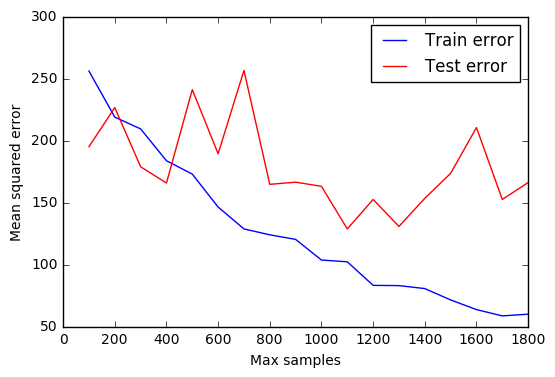

In [115]:
line1 = plt.plot(max_samples, train_results, 'b', label='Train error')
line2 = plt.plot(max_samples, test_results, 'r' , label='Test error')
plt.ylabel('Mean squared error')
plt.xlabel('Max samples')
plt.legend()
plt.show()

In [119]:
n_estimators = [10, 20, 30, 50, 100, 150, 200, 300, 400, 500]
train_results = []
test_results = []

In [120]:
for estimators in n_estimators:
    model = BaggingRegressor(n_estimators = estimators)
    model.fit(data_regressor_train_x_cv, data_regressor_train_y_cv)
    train_pred = model.predict(data_regressor_train_x_cv)
    mse_train = mean_squared_error(train_pred, data_regressor_train_y_cv)
    train_results.append(mse_train)
    test_pred = model.predict(data_regressor_test_x_cv)
    mse_test = mean_squared_error(test_pred, data_regressor_test_y_cv)
    test_results.append(mse_test)

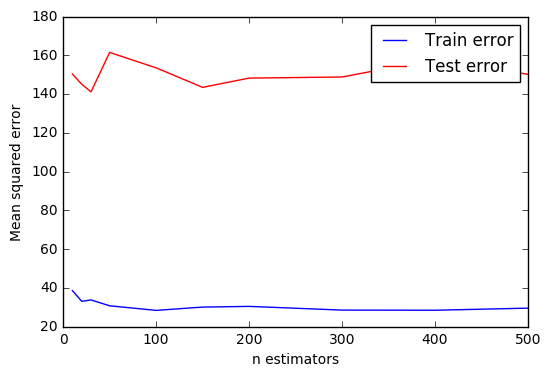

In [121]:
line1 = plt.plot(n_estimators, train_results, 'b', label='Train error')
line2 = plt.plot(n_estimators, test_results, 'r' , label='Test error')
plt.ylabel('Mean squared error')
plt.xlabel('n estimators')
plt.legend()
plt.show()

In [ ]:
n_estimators = [10, 20, 30, 50, 100, 150, 200, 300, 400, 500]
train_results = []
test_results = []

In [41]:
for estimators in n_estimators:
    model = BaggingRegressor(n_estimators = estimators)
    model.fit(data_regressor_train_x_cv, data_regressor_train_y_cv)
    train_pred = model.predict(data_regressor_train_x_cv)
    mse_train = mean_squared_error(train_pred, data_regressor_train_y_cv)
    train_results.append(mse_train)
    test_pred = model.predict(data_regressor_test_x_cv)
    mse_test = mean_squared_error(test_pred, data_regressor_test_y_cv)
    test_results.append(mse_test)

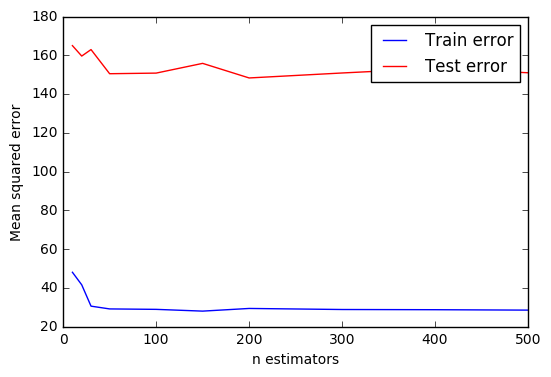

In [42]:
line1 = plt.plot(n_estimators, train_results, 'b', label='Train error')
line2 = plt.plot(n_estimators, test_results, 'r' , label='Test error')
plt.ylabel('Mean squared error')
plt.xlabel('n estimators')
plt.legend()
plt.show()

In [35]:
Params_regressor = {
                    "bootstrap" : [True, False],
                    "bootstrap_features" : [True, False], 
                    "max_features" : [50, 75, 125, 150, 175, 200],
                    "max_samples" : [300,500,900,1400,1700],
                    "n_estimators" : [100, 150, 200, 300]
                    }

In [36]:
BaggingRegressor_cv = BaggingRegressor()

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
RandomizedSearch_BaggingRegressor = RandomizedSearchCV(estimator = BaggingRegressor_cv, param_distributions = Params_regressor, n_iter=100, scoring='neg_mean_squared_error', cv=10)

In [40]:
RandomizedSearch_BaggingRegressor.fit(data_regressor_train_x, data_regressor_train_y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'bootstrap_features': [True, False], 'max_features': [50, 75, 125, 150, 175, 200], 'max_samples': [300, 500, 900, 1400, 1700], 'n_estimators': [100, 150, 200, 300], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_squared_error',
          verbose=0)

In [41]:
RandomizedSearch_BaggingRegressor.best_estimator_

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=200, max_samples=1400,
         n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [62]:
RandomizedSearch_BaggingRegressor.best_estimator_

BaggingRegressor(base_estimator=None, bootstrap=False,
         bootstrap_features=False, max_features=150, max_samples=1200,
         n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [36]:
best_bagging = BaggingRegressor(base_estimator=None, bootstrap=False,
         bootstrap_features=False, max_features=150, max_samples=1200,
         n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [45]:
best_bagging = BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=200, max_samples=1400,
         n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [46]:
best_bagging.fit(data_regressor_train_x, data_regressor_train_y)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=200, max_samples=1400,
         n_estimators=300, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [47]:
data_regressor_test_x = data_regressor_test.drop(['LotFrontage'], axis = 1)

In [48]:
y_pred_regressor = best_bagging.predict(data_regressor_test_x)

In [49]:
data_regressor_train_x.shape

(2433, 269)

In [50]:
y_LotFrontage = data_regressor['LotFrontage']

In [51]:
y_LotFrontage = y_LotFrontage.fillna(-1)
j=0 
l=0
for i in y_LotFrontage:
    if i==-1:
        y_LotFrontage[l]=y_pred_regressor[j]
        j=j+1
    l=l+1

In [52]:
y_LotFrontage.isnull().sum()

0

In [42]:
y_LotFrontage.to_csv('LotFrontage.csv')

In [53]:
name_1 = combined[column_name_with_null_values[1]]

In [54]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
mask = ~name_1.isnull()
name_1[mask] = labelencoder_X.fit_transform(name_1[mask])
##name_1.value_counts()

In [55]:
data_classifier = pd.concat([data_for_use_without_null_dummy, name_1], axis=1)

In [56]:
data_classifier_train = data_classifier.dropna(axis = 0)
data_classifier_test = data_classifier[data_classifier.isnull().any(axis=1)]

In [57]:
print(data_classifier_train.shape)
print(data_classifier_test.shape)

(1499, 270)
(1420, 270)


In [58]:
data_classifier_train_x = data_classifier_train.iloc[:, :-1].values
data_classifier_train_y = data_classifier_train.iloc[:, 269].values
data_classifier_train_y = data_classifier_train_y.astype('int')
data_classifier_train_y= data_classifier_train_y. reshape(1499,)

In [59]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [52]:
RandomForestClassifier = RandomForestClassifier()
score_RandomForestClassifier = cross_val_score(RandomForestClassifier, data_classifier_train_x, data_classifier_train_y, cv=5, scoring= 'accuracy')
RandomForestClassifier = score_RandomForestClassifier.mean()
print(RandomForestClassifier)

0.699145021985


In [53]:
BaggingClassifier = BaggingClassifier()
score_BaggingClassifier = cross_val_score(BaggingClassifier, data_classifier_train_x, data_classifier_train_y, cv=5, scoring= 'accuracy')
BaggingClassifier = score_BaggingClassifier.mean()
print(BaggingClassifier)

0.707125548764


In [61]:
GradientBoostingClassifier = GradientBoostingClassifier()
score_GradientBoostingClassifier = cross_val_score(GradientBoostingClassifier, data_classifier_train_x, data_classifier_train_y, cv=5, scoring= 'accuracy')
GradientBoostingClassifier = score_GradientBoostingClassifier.mean()
print(GradientBoostingClassifier)

0.720528644424


In [55]:
AdaBoostClassifier = AdaBoostClassifier()
score_AdaBoostClassifier = cross_val_score(AdaBoostClassifier, data_classifier_train_x, data_classifier_train_y, cv=5, scoring= 'accuracy')
AdaBoostClassifier = score_AdaBoostClassifier.mean()
print(AdaBoostClassifier)

0.43024442754


In [56]:
SVC = SVC()
score_SVC = cross_val_score(SVC, data_classifier_train_x, data_classifier_train_y, cv=5, scoring= 'accuracy')
SVC = score_SVC.mean()
print(SVC)

0.497672122278


In [57]:
KNeighborsClassifier = KNeighborsClassifier()
score_KNeighborsClassifier = cross_val_score(KNeighborsClassifier, data_classifier_train_x, data_classifier_train_y, cv=5, scoring= 'accuracy')
KNeighborsClassifier = score_KNeighborsClassifier.mean()
print(KNeighborsClassifier)

0.54040422306


In [58]:
XGBClassifier = XGBClassifier()
score_XGBClassifier = cross_val_score(XGBClassifier, data_classifier_train_x, data_classifier_train_y, cv=5, scoring= 'accuracy')
XGBClassifier = score_XGBClassifier.mean()
print(XGBClassifier)

0.714532674373


In [60]:
data_classifier_train_x.shape

(1499, 269)

In [61]:
data_classifier_train_y.shape

(1499,)

In [62]:
data_classifier_train_x_cv, data_classifier_test_x_cv, data_classifier_train_y_cv, data_classifier_test_y_cv = train_test_split(data_classifier_train_x, data_classifier_train_y, test_size=.1, random_state=0)

In [63]:
print(data_classifier_train_x_cv.shape)
print(data_classifier_test_x_cv.shape)
print(data_classifier_train_y_cv.shape)
print(data_classifier_test_y_cv.shape)

(1349, 269)
(150, 269)
(1349,)
(150,)


In [64]:
from sklearn.metrics import accuracy_score

In [56]:
GradientBoostingClassifier1 = GradientBoostingClassifier()

In [57]:
GradientBoostingClassifier1.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [58]:
y_train_pred = GradientBoostingClassifier1.predict(data_classifier_train_x_cv)
y_test_pred = GradientBoostingClassifier1.predict(data_classifier_test_x_cv)

train_error = accuracy_score(y_train_pred, data_classifier_train_y_cv)
test_error = accuracy_score(y_test_pred, data_classifier_test_y_cv)

print(train_error)
print(test_error)

0.943661971831
0.706666666667


In [119]:
GradientBoostingClassifier2 = GradientBoostingClassifier(learning_rate=0.2, max_depth=3, n_estimators=50, max_features=150,  max_leaf_nodes=12, min_samples_leaf=5, min_samples_split=15)

In [123]:
GradientBoostingClassifier2.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=3,
              max_features=150, max_leaf_nodes=12,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=15,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [124]:
y_train_pred = GradientBoostingClassifier2.predict(data_classifier_train_x_cv)
y_test_pred = GradientBoostingClassifier2.predict(data_classifier_test_x_cv)

train_error = accuracy_score(y_train_pred, data_classifier_train_y_cv)
test_error = accuracy_score(y_test_pred, data_classifier_test_y_cv)

print(train_error)
print(test_error)

0.97776130467
0.753333333333


In [73]:
learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5, 1]
train_results = []
test_results = []

In [74]:
for rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate = rate)
    model.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)
    train_pred = model.predict(data_classifier_train_x_cv)
    acc_train = accuracy_score(train_pred, data_classifier_train_y_cv)
    train_results.append(acc_train)
    test_pred = model.predict(data_classifier_test_x_cv)
    acc_test = accuracy_score(test_pred, data_classifier_test_y_cv)
    test_results.append(acc_test)

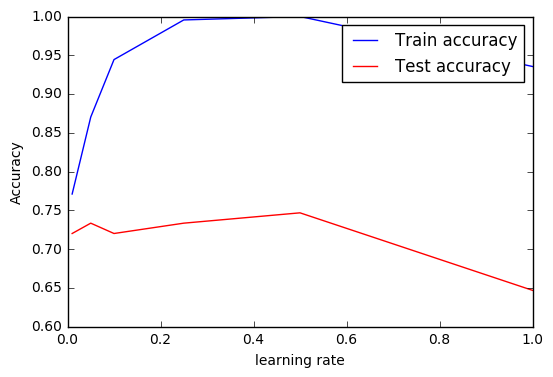

In [75]:
line1 = plt.plot(learning_rates, train_results, 'b', label='Train accuracy')
line2 = plt.plot(learning_rates, test_results, 'r' , label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('learning rate')
plt.legend()
plt.show()

In [68]:
max_depth = [3,4,5,6,7,8,9,10,11,12,13,14,15]
train_results = []
test_results = []

In [69]:
for depth in max_depth:
    model = GradientBoostingClassifier(max_depth = depth)
    model.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)
    train_pred = model.predict(data_classifier_train_x_cv)
    acc_train = accuracy_score(train_pred, data_classifier_train_y_cv)
    train_results.append(acc_train)
    test_pred = model.predict(data_classifier_test_x_cv)
    acc_test = accuracy_score(test_pred, data_classifier_test_y_cv)
    test_results.append(acc_test)

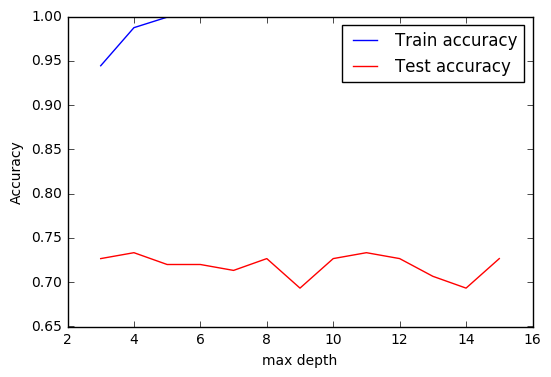

In [71]:
line1 = plt.plot(max_depth, train_results, 'b', label='Train accuracy')
line2 = plt.plot(max_depth, test_results, 'r' , label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.legend()
plt.show()

In [78]:
n_estimators = [10, 20, 30, 50, 100, 150, 200, 300, 400, 500]
train_results = []
test_results = []

In [79]:
for estimators in n_estimators:
    model = GradientBoostingClassifier(n_estimators = estimators)
    model.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)
    train_pred = model.predict(data_classifier_train_x_cv)
    acc_train = accuracy_score(train_pred, data_classifier_train_y_cv)
    train_results.append(acc_train)
    test_pred = model.predict(data_classifier_test_x_cv)
    acc_test = accuracy_score(test_pred, data_classifier_test_y_cv)
    test_results.append(acc_test)

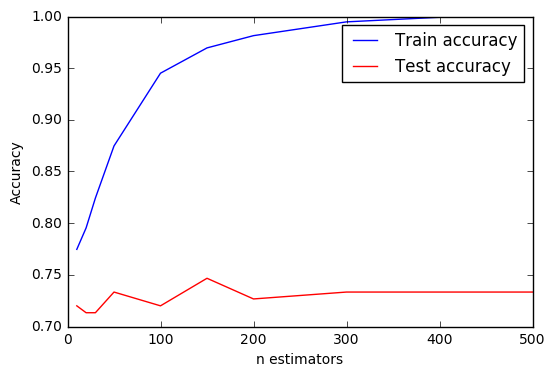

In [80]:
line1 = plt.plot(n_estimators, train_results, 'b', label='Train accuracy')
line2 = plt.plot(n_estimators, test_results, 'r' , label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n estimators')
plt.legend()
plt.show()

In [86]:
max_features =  [10, 20, 30, 50, 75, 100, 125, 150, 175, 200]
train_results = []
test_results = []

In [87]:
for features in max_features:
    model = GradientBoostingClassifier(max_features = features)
    model.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)
    train_pred = model.predict(data_classifier_train_x_cv)
    acc_train = accuracy_score(train_pred, data_classifier_train_y_cv)
    train_results.append(acc_train)
    test_pred = model.predict(data_classifier_test_x_cv)
    acc_test = accuracy_score(test_pred, data_classifier_test_y_cv)
    test_results.append(acc_test)

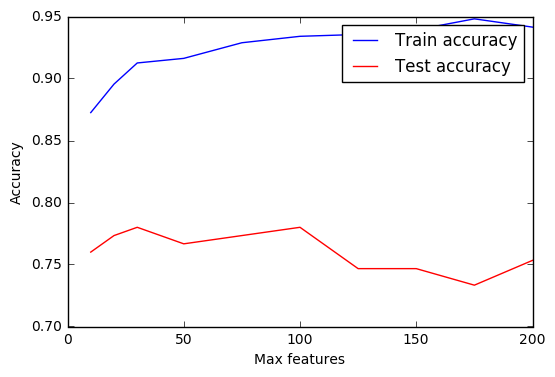

In [88]:
line1 = plt.plot(max_features, train_results, 'b', label='Train accuracy')
line2 = plt.plot(max_features, test_results, 'r' , label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max features')
plt.legend()
plt.show()

In [91]:
max_leaf_nodes = [4, 8, 12, 16, 20, 24, 28, 32]
train_results = []
test_results = []

In [92]:
for leaf_nodes in max_leaf_nodes:
    model = GradientBoostingClassifier(max_leaf_nodes = leaf_nodes)
    model.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)
    train_pred = model.predict(data_classifier_train_x_cv)
    acc_train = accuracy_score(train_pred, data_classifier_train_y_cv)
    train_results.append(acc_train)
    test_pred = model.predict(data_classifier_test_x_cv)
    acc_test = accuracy_score(test_pred, data_classifier_test_y_cv)
    test_results.append(acc_test)

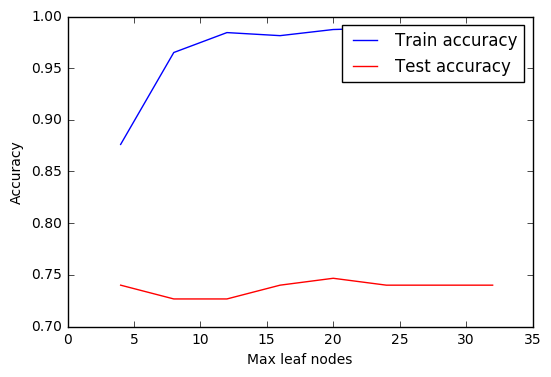

In [94]:
line1 = plt.plot(max_leaf_nodes, train_results, 'b', label='Train accuracy')
line2 = plt.plot(max_leaf_nodes, test_results, 'r' , label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Max leaf nodes')
plt.legend()
plt.show()

In [95]:
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train_results = []
test_results = []

In [96]:
for samples_leaf in min_samples_leaf:
    model = GradientBoostingClassifier(min_samples_leaf = samples_leaf)
    model.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)
    train_pred = model.predict(data_classifier_train_x_cv)
    acc_train = accuracy_score(train_pred, data_classifier_train_y_cv)
    train_results.append(acc_train)
    test_pred = model.predict(data_classifier_test_x_cv)
    acc_test = accuracy_score(test_pred, data_classifier_test_y_cv)
    test_results.append(acc_test)

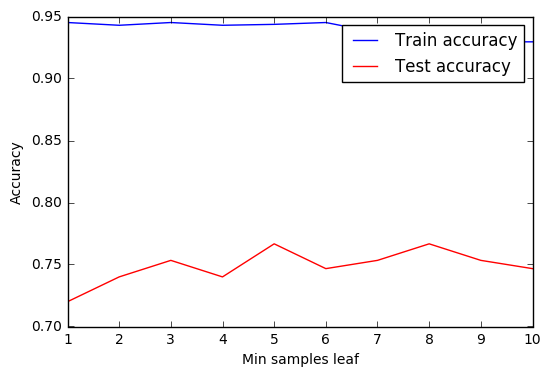

In [97]:
line1 = plt.plot(min_samples_leaf, train_results, 'b', label='Train accuracy')
line2 = plt.plot(min_samples_leaf, test_results, 'r' , label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Min samples leaf')
plt.legend()
plt.show()

In [98]:
min_samples_split = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
train_results = []
test_results = []

In [99]:
for samples_split in min_samples_split:
    model = GradientBoostingClassifier(min_samples_split = samples_split)
    model.fit(data_classifier_train_x_cv, data_classifier_train_y_cv)
    train_pred = model.predict(data_classifier_train_x_cv)
    acc_train = accuracy_score(train_pred, data_classifier_train_y_cv)
    train_results.append(acc_train)
    test_pred = model.predict(data_classifier_test_x_cv)
    acc_test = accuracy_score(test_pred, data_classifier_test_y_cv)
    test_results.append(acc_test)

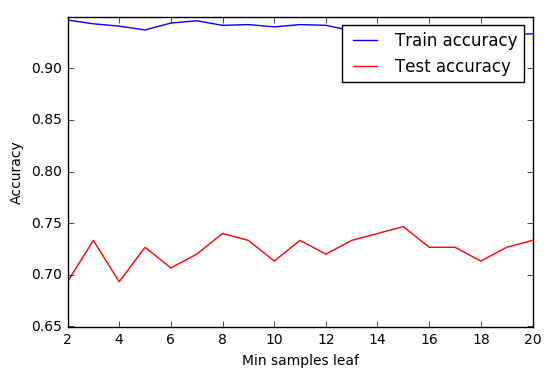

In [100]:
line1 = plt.plot(min_samples_split, train_results, 'b', label='Train accuracy')
line2 = plt.plot(min_samples_split, test_results, 'r' , label='Test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Min samples leaf')
plt.legend()
plt.show()

In [65]:
Params_classifier = {
                        "learning_rate" : [0.01, 0.05, 0.1, 0.25, 0.5], 
                        "max_depth" : [3,4,5,6,7,8,10,11,12,13,15],
                        "n_estimators" : [50, 100, 150, 200, 300, 400, 500],
                        "max_features" : [10, 20, 30, 50, 75, 100],  
                        "max_leaf_nodes" : [4, 16, 20, 24, 28, 32], 
                        "min_samples_leaf" : [3, 5, 6, 7, 8, 9, 10], 
                        "min_samples_split" : [3, 5, 7, 8, 9, 11, 13, 14, 15, 16, 17, 19, 20]
                    }

In [66]:
GradientBoostingClassifier_cv = GradientBoostingClassifier()

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
RandomizedSearch_GradientBoostingClassifier = RandomizedSearchCV(estimator = GradientBoostingClassifier_cv, param_distributions = Params_classifier, n_iter=100, scoring='accuracy', cv=10)

In [69]:
RandomizedSearch_GradientBoostingClassifier.fit(data_classifier_train_x, data_classifier_train_y)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'min_samples_split': [3, 5, 7, 8, 9, 11, 13, 14, 15, 16, 17, 19, 20], 'min_samples_leaf': [3, 5, 6, 7, 8, 9, 10], 'max_depth': [3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15], 'n_estimators': [50, 100, 150, 200, 300, 400, 500], 'max_leaf_nodes': [4, 16, 20, 24, 28, 32], 'learning_rate': [0.01, 0.05, 0.1, 0.25, 0.5], 'max_features': [10, 20, 30, 50, 75, 100]},
          pre_disp

In [70]:
RandomizedSearch_GradientBoostingClassifier.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=75, max_leaf_nodes=20,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=5, min_samples_split=9,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)